## Deploy de Aplicações

In [112]:
import pandas as pd 


### Importando Bibliotecas

In [113]:
cadastrados = pd.read_csv('clientes_cadastrados.csv')


In [114]:
cadastrados.head()


,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [115]:
cadastrados.shape


(438557, 18)

In [116]:
cadastrados['ID_Cliente'].value_counts()
# Verificando valores duplicados


ID_Cliente
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64

### Verificando Duplicados

In [117]:
# Não podemos ter clientes duplicados no Data Frame

# keep = Faz com que todas as duplicadas sejam marcadas como True
cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)].shape

# Temos 94 Id de clientes duplicados


(94, 18)

### Armazenando Repetidos em uma variável

In [118]:
# Armazenando os repetidos dentro de uma variável

id_repetidos = cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)]


### Armazendo Dados Únicos em uma Variável

In [119]:
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index)


In [120]:
df_cadastrados_limpo['ID_Cliente'].value_counts()


ID_Cliente
5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: count, Length: 438463, dtype: int64

### Verificando dados Nulos

In [121]:
df_cadastrados_limpo.isnull().sum()


ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

### Tratamento da Coluna com Nulos

In [122]:
df_cadastrados_limpo['Ocupacao'].unique()


array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

### Substituindo Nulo por um Valor

In [123]:
df_cadastrados_limpo['Ocupacao'].fillna(value='Outro', inplace=True)


C:\Users\fabia\AppData\Local\Temp\ipykernel_19548\1225039953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cadastrados_limpo['Ocupacao'].fillna(value='Outro', inplace=True)


In [124]:
df_cadastrados_limpo.isnull().sum()


ID_Cliente               0
Genero                   0
Tem_carro                0
Tem_casa_propria         0
Qtd_filhos               0
Rendimento_anual         0
Categoria_de_renda       0
Grau_escolaridade        0
Estado_civil             0
Moradia                  0
Idade                    0
Anos_empregado           0
Tem_celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_familia          0
dtype: int64

### Quantos itens diferentes em cada coluna

In [125]:
df_cadastrados_limpo.nunique()


ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

### Retirando algumas colunas do DF


In [126]:
df_cadastrados_limpo.drop('Genero', axis=1, inplace=True)
# axis = 1 --> Indica que é uma coluna


In [127]:
# Não faz sentido termos uma variável que é igual pra todo mundo! Exemplo: Celular / Vamos retirar também

df_cadastrados_limpo.drop('Tem_celular', axis=1, inplace=True)


### Verificando valores únicos de colunas específicas

### Trantando valores binários

In [128]:
df_cadastrados_limpo['Tem_carro'].unique()


array(['Y', 'N'], dtype=object)

In [129]:
df_cadastrados_limpo['Tem_casa_propria'].unique()


array(['Y', 'N'], dtype=object)

In [130]:
df_cadastrados_limpo['Tem_telefone_trabalho'].unique()

# Este está correto / Esta como 1 e 0, onde 1 = Tem e 0 = não tem


array([1, 0], dtype=int64)

### Verificando a Tipagem dos dados

In [131]:
df_cadastrados_limpo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [135]:
# Transformando os Y e N em Binário
df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace(['Y', 'N'], [1, 0])


In [136]:
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace(['Y','N'],[1,0])


In [137]:
df_cadastrados_limpo.head()


,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0


### Tratando as colunas de Idade  e Anos Empregados

In [138]:
df_cadastrados_limpo['Idade'] = - df_cadastrados_limpo['Idade']/365.2425


In [139]:
df_cadastrados_limpo['Anos_empregado'] = - df_cadastrados_limpo['Anos_empregado']/365.2425


In [140]:
df_cadastrados_limpo.head()


,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [141]:
df_cadastrados_limpo['Anos_empregado'].value_counts()


Anos_empregado
-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 37.041144          1
 27.989623          1
 24.413917          1
 31.291539          1
 22.190736          1
Name: count, Length: 9406, dtype: int64

In [142]:
# O valor de -1000.001369 refere-se as pessoas desempregadas e não podemos ter -1000 na base. Precisamos tratar esse número

df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado']<0,'Anos_empregado']=0


In [143]:
df_cadastrados_limpo['Anos_empregado'].value_counts()


Anos_empregado
0.000000     75314
0.596864       262
4.594208       251
0.681739       241
2.677673       240
             ...  
37.041144        1
27.989623        1
24.413917        1
31.291539        1
22.190736        1
Name: count, Length: 9406, dtype: int64

In [144]:
df_cadastrados_limpo.head()


,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


### Correlação entre as variáveis

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns


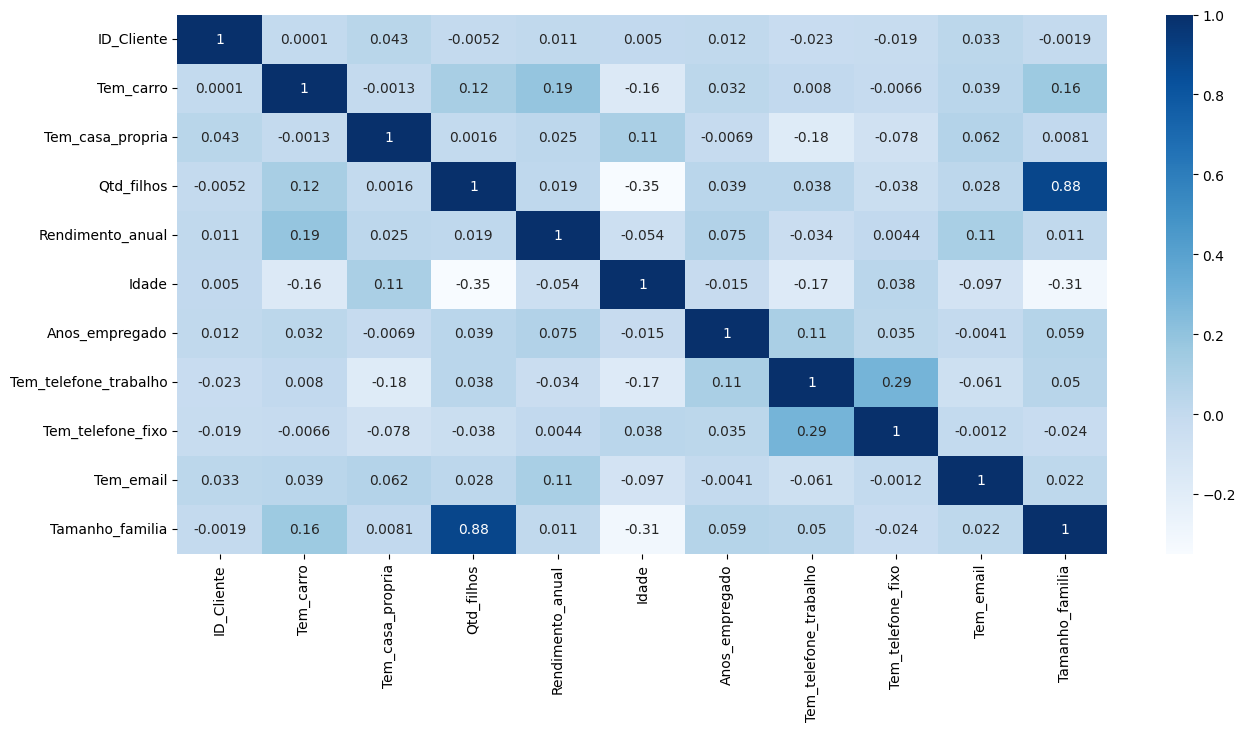

In [149]:
# Seleciona apenas colunas numéricas
corr = df_cadastrados_limpo.select_dtypes(include=['number']).corr()

# Gera o heatmap de correlação
plt.figure(figsize=(15,7))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()


Atenção!!! Quando temos alta correlação podemos ter problemas de overfit nos Modelos de ML  
Exemplo: Tamanho da Família com a Quantidade de Filhos  

Vamos retirar a quantidade de Filhos

In [150]:
df_cadastrados_limpo.drop(['Qtd_filhos'], axis=1, inplace=True)
# axis = 1 indica coluna e inplace para ser executado nesse código / aqui mesmo


In [151]:
df_cadastrados_limpo.head()


,ID_Cliente,Tem_carro,Tem_casa_propria,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


### Organizando as colunas

In [154]:
df_cadastrados_limpo = df_cadastrados_limpo[['ID_Cliente','Tem_carro','Tem_casa_propria','Tem_telefone_trabalho','Tem_telefone_fixo',
                                             'Tem_email','Tamanho_familia','Rendimento_anual','Idade','Anos_empregado','Categoria_de_renda',
                                             'Grau_escolaridade','Estado_civil','Moradia','Ocupacao']]


In [155]:
df_cadastrados_limpo.head()


,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


### O que temos de mais predominante em cada variável?


In [156]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize=True)*100
# Desta forma temos a porcentagem da categoria de renda


Categoria_de_renda
Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: proportion, dtype: float64

## Criando a Variável Target